In [1]:
import warnings
warnings.filterwarnings('ignore') #Ignoring the warning messages
import pandas as pd 
import seaborn as sns
from sklearn. model_selection import train_test_split, GridSearchCV 
from sklearn. linear_model import LogisticRegression 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from sklearn. metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
# Read the label data from Excel
# Bringing only the 2nd column from the 'aggregateRockData.xlsx'
label_data = pd.read_excel('/Users/malhardhopate/Desktop/IUB/Fall 2023/Applied Machine Learning/HW2/Q1/Homework 2/aggregateRockData.xlsx', usecols = [1], header = None)
label_data.columns = ['rock category']

# Read the feature data from the text file
# Bringing only coulumns 4 to 22
feature_data = pd.read_csv('/Users/malhardhopate/Desktop/IUB/Fall 2023/Applied Machine Learning/HW2/Q1/Homework 2/norm540.txt', delimiter='\t', usecols = range(3, 22), header = None)
feature_data.columns = ['Porphyritic texture',
    'Presence of holes',
    'Salient green hue',
    'Pegmatitic texture',
    'Conchoidal fracture',
    'Angular fragments',
    'Rounded fragments',
    'Straight stripes',
    'Curved stripes',
    'Physical layers',
    'Veins',
    'Oily/shimmery texture',
    'Splotchy texture',
    'Single trans lucent crystal',
    'Multiple cubic crystals',
    'Sandy texture',
    'Fragments (disjunctive)',
    'Stripes (disjunctive)',
    'Crystals (disjunctive)'
    ]

print(label_data.head(5))
print("*"*100)
print(feature_data.head(5))


   rock category
0              1
1              1
2              1
3              1
4              1
****************************************************************************************************
   Porphyritic texture  Presence of holes  Salient green hue  \
0             1.690468          -0.159688          -0.646115   
1             1.690468          -0.159688          -0.530724   
2             1.665576          -0.407623           0.858984   
3             2.233118          -0.407623          -0.415333   
4             2.213204          -0.159688           1.129901   

   Pegmatitic texture  Conchoidal fracture  Angular fragments  \
0           -0.252007            -0.609794           0.579927   
1            0.127922            -0.482150           2.865772   
2           -0.631936            -0.443857           2.611790   
3           -0.424702            -1.120369           0.071962   
4           -0.044773            -1.082076           1.341876   

   Rounded fragments 

In [3]:
#Joining the label_data & feature_data to make a new datafile
datafile = feature_data.join(label_data)
datafile.head(5)

Porphyritic texture  Presence of holes  Salient green hue  \
0             1.690468          -0.159688          -0.646115   
1             1.690468          -0.159688          -0.530724   
2             1.665576          -0.407623           0.858984   
3             2.233118          -0.407623          -0.415333   
4             2.213204          -0.159688           1.129901   

   Pegmatitic texture  Conchoidal fracture  Angular fragments  \
0           -0.252007            -0.609794           0.579927   
1            0.127922            -0.482150           2.865772   
2           -0.631936            -0.443857           2.611790   
3           -0.424702            -1.120369           0.071962   
4           -0.044773            -1.082076           1.341876   

   Rounded fragments  Straight stripes  Curved stripes  Physical layers  \
0           0.375313         -0.352386       -0.260224        -0.759128   
1           0.375313         -0.352386       -0.260224        -0.529150   
2          -0.405184         -0.352386       -0.260224        -0.529150   
3           4.017633         -0.352386       -0.260224        -0.529150   
4           3.757467         -0.352386       -0.260224        -0.759128   

      Veins  Oily/shimmery texture  Splotchy texture  \
0 -0.013842              -0.540653          0.946521   
1 -0.512160              -0.540653         -0.249084   
2 -0.512160              -0.540653          1.245422   
3 -0.512160              -0.540653         -0.249084   
4 -0.512160              -0.540653         -0.249084   

   Single trans lucent crystal  Multiple cubic crystals  Sandy texture  \
0                    -0.227922                -0.225045      -0.116312   
1                    -0.227922                 0.185510      -0.401124   
2                    -0.227922                -0.225045      -0.401124   
3                    -0.227922                -0.225045      -0.116312   
4                    -0.227922                -0.225045      -0.401124   

   Fragments (disjunctive)  Stripes (disjunctive)  Crystals (disjunctive)  \
0                 0.635812              -0.409247               -0.310419   
1                 2.042938              -0.409247               -0.034059   
2                 1.665865              -0.409247               -0.310419   
3                 2.640737              -0.409247               -0.310419   
4                 2.659131              -0.409247               -0.310419   

   rock category  
0              1  
1              1  
2              1  
3              1  
4              1

<h1>Question 1 <br> Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? </h1>

In [4]:
print(f"Number of Rows: {feature_data.shape[0]}")
print(f"Number of Columns: {feature_data.shape[1]}")

Number of Rows: 540
Number of Columns: 19


In [5]:
feature_data.describe()

Porphyritic texture  Presence of holes  Salient green hue  \
count         5.400000e+02       5.400000e+02       5.400000e+02   
mean         -1.851852e-09       9.629630e-08       5.370370e-08   
std           1.000000e+00       1.000000e+00       1.000000e+00   
min          -1.321491e+00      -4.076230e-01      -1.187950e+00   
25%          -8.236470e-01      -4.076230e-01      -7.615050e-01   
50%          -3.009100e-01      -4.076230e-01      -3.751970e-01   
75%           7.644770e-01      -1.596880e-01       5.843033e-01   
max           2.422299e+00       4.551072e+00       2.750390e+00   

       Pegmatitic texture  Conchoidal fracture  Angular fragments  \
count        5.400000e+02         5.400000e+02       5.400000e+02   
mean        -6.296296e-08        -4.074074e-08      -1.537037e-07   
std          1.000000e+00         1.000000e+00       1.000000e+00   
min         -1.322715e+00        -1.248012e+00      -4.360040e-01   
25%         -8.046310e-01        -6.991450e-01      -4.360040e-01   
50%         -1.829290e-01        -2.715380e-01      -4.360040e-01   
75%          5.769290e-01         3.571070e-01      -1.820210e-01   
max          4.175892e+00         3.813059e+00       4.643652e+00   

       Rounded fragments  Straight stripes  Curved stripes  Physical layers  \
count       5.400000e+02      5.400000e+02    5.400000e+02     5.400000e+02   
mean       -1.666667e-08     -1.814815e-07   -1.481481e-08    -1.166667e-07   
std         1.000000e+00      1.000000e+00    1.000000e+00     1.000000e+00   
min        -4.051840e-01     -3.523860e-01   -2.602240e-01    -7.591280e-01   
25%        -4.051840e-01     -3.523860e-01   -2.602240e-01    -7.591280e-01   
50%        -4.051840e-01     -3.523860e-01   -2.602240e-01    -2.991730e-01   
75%        -1.450180e-01     -3.523860e-01   -2.602240e-01     3.907600e-01   
max         4.798130e+00      4.888957e+00    5.862693e+00     3.610446e+00   

              Veins  Oily/shimmery texture  Splotchy texture  \
count  5.400000e+02           5.400000e+02      5.400000e+02   
mean  -1.629630e-07           1.703704e-07     -6.851852e-08   
std    1.000000e+00           9.999999e-01      1.000000e+00   
min   -5.121600e-01          -5.406530e-01     -8.468870e-01   
25%   -5.121600e-01          -5.406530e-01     -8.468870e-01   
50%   -5.121600e-01          -5.406530e-01     -2.490840e-01   
75%   -1.384200e-02          -1.658870e-01      3.487180e-01   
max    8.457556e+00           3.207009e+00      4.832237e+00   

       Single trans lucent crystal  Multiple cubic crystals  Sandy texture  \
count                 5.400000e+02             5.400000e+02   5.400000e+02   
mean                 -5.555556e-09             3.388889e-07   1.203704e-07   
std                   1.000000e+00             9.999999e-01   1.000000e+00   
min                  -2.279220e-01            -2.250450e-01  -6.859370e-01   
25%                  -2.279220e-01            -2.250450e-01  -6.859370e-01   
50%                  -2.279220e-01            -2.250450e-01  -4.011240e-01   
75%                  -2.279220e-01            -2.250450e-01   1.685000e-01   
max                   7.120010e+00             7.986072e+00   5.010309e+00   

       Fragments (disjunctive)  Stripes (disjunctive)  Crystals (disjunctive)  
count             5.400000e+02           5.400000e+02            5.400000e+02  
mean             -1.148148e-07          -1.759259e-07            3.018519e-07  
std               1.000000e+00           1.000000e+00            9.999999e-01  
min              -5.413910e-01          -4.092470e-01           -3.104190e-01  
25%              -5.413910e-01          -4.092470e-01           -3.104190e-01  
50%              -5.413910e-01          -4.092470e-01           -3.104190e-01  
75%               1.042300e-02          -2.072980e-01           -3.104190e-01  
max               3.137369e+00           3.629722e+00            5.216791e+00

In [6]:
feature_data.isna().sum()

Porphyritic texture            0
Presence of holes              0
Salient green hue              0
Pegmatitic texture             0
Conchoidal fracture            0
Angular fragments              0
Rounded fragments              0
Straight stripes               0
Curved stripes                 0
Physical layers                0
Veins                          0
Oily/shimmery texture          0
Splotchy texture               0
Single trans lucent crystal    0
Multiple cubic crystals        0
Sandy texture                  0
Fragments (disjunctive)        0
Stripes (disjunctive)          0
Crystals (disjunctive)         0
dtype: int64

array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily/shimmery texture'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single trans lucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments (disjunctive)'}>,
        <Axes: title={'center': 'Stripes (disjunctive

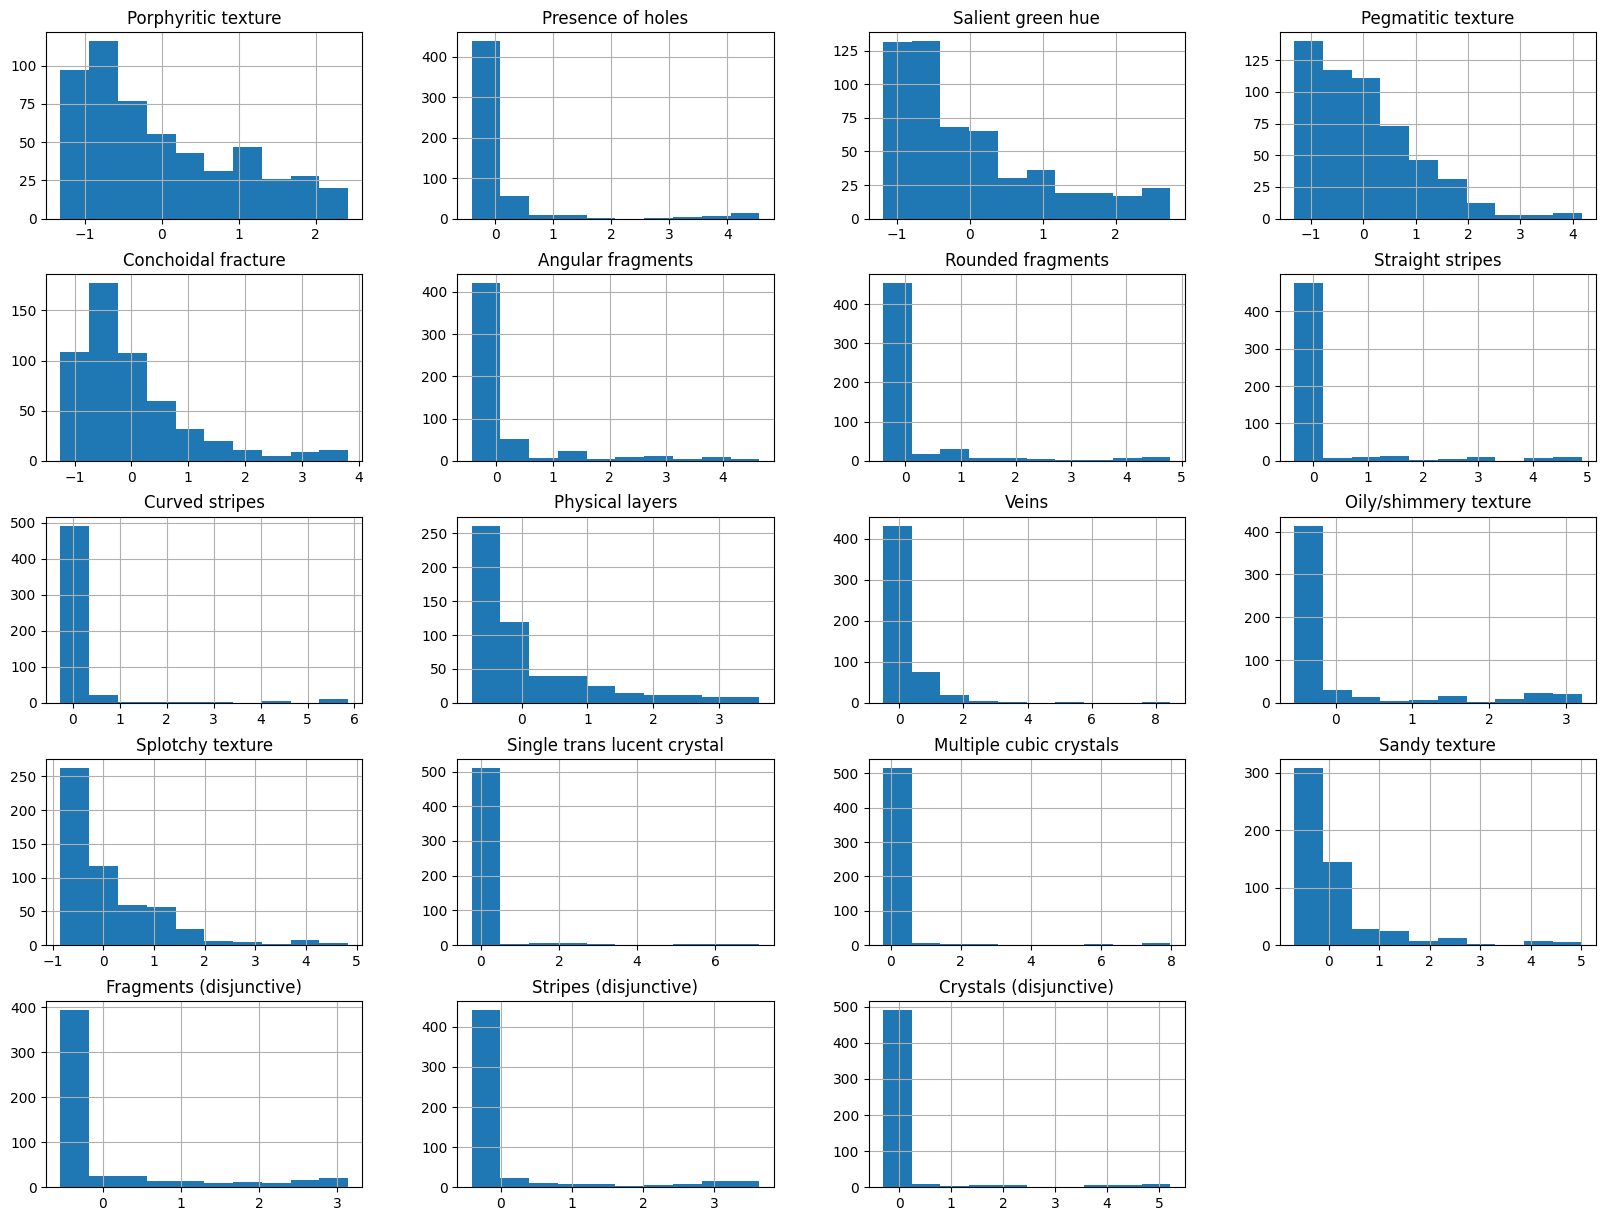

In [7]:
feature_data.hist(grid=True,figsize=(20,15))

<H3>Answer 1</H3>
<H3>There is no special treatment required for any attributes as there are no NA values for in the data.</H3>

<h1>Question 2 <br> Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. </h1>

In [8]:
feature_data.corr(method="pearson")

Porphyritic texture  Presence of holes  \
Porphyritic texture                     1.000000           0.017601   
Presence of holes                       0.017601           1.000000   
Salient green hue                       0.255830          -0.026329   
Pegmatitic texture                      0.534070          -0.199425   
Conchoidal fracture                    -0.505542          -0.248047   
Angular fragments                       0.645724          -0.026176   
Rounded fragments                       0.653319          -0.026623   
Straight stripes                       -0.117642          -0.112504   
Curved stripes                         -0.026782          -0.086442   
Physical layers                        -0.490498          -0.210501   
Veins                                  -0.189307          -0.155518   
Oily/shimmery texture                  -0.310966          -0.154314   
Splotchy texture                        0.373241          -0.098999   
Single trans lucent crystal            -0.163897          -0.082330   
Multiple cubic crystals                 0.046817          -0.044729   
Sandy texture                          -0.226060           0.283791   
Fragments (disjunctive)                 0.819815          -0.035854   
Stripes (disjunctive)                  -0.108380          -0.132162   
Crystals (disjunctive)                 -0.086319          -0.087471   

                             Salient green hue  Pegmatitic texture  \
Porphyritic texture                   0.255830            0.534070   
Presence of holes                    -0.026329           -0.199425   
Salient green hue                     1.000000            0.126113   
Pegmatitic texture                    0.126113            1.000000   
Conchoidal fracture                  -0.189701            0.055266   
Angular fragments                     0.064291            0.450381   
Rounded fragments                     0.186064            0.321181   
Straight stripes                     -0.061815           -0.081682   
Curved stripes                        0.006080            0.006070   
Physical layers                      -0.050614           -0.334001   
Veins                                -0.033938           -0.099182   
Oily/shimmery texture                -0.131127            0.180904   
Splotchy texture                      0.089565            0.141837   
Single trans lucent crystal          -0.168250            0.128090   
Multiple cubic crystals               0.011505            0.237183   
Sandy texture                        -0.072024           -0.442259   
Fragments (disjunctive)               0.169734            0.498259   
Stripes (disjunctive)                -0.042696           -0.055575   
Crystals (disjunctive)               -0.109629            0.243675   

                             Conchoidal fracture  Angular fragments  \
Porphyritic texture                    -0.505542           0.645724   
Presence of holes                      -0.248047          -0.026176   
Salient green hue                      -0.189701           0.064291   
Pegmatitic texture                      0.055266           0.450381   
Conchoidal fracture                     1.000000          -0.210173   
Angular fragments                      -0.210173           1.000000   
Rounded fragments                      -0.260734           0.260913   
Straight stripes                       -0.019918          -0.137379   
Curved stripes                          0.058211          -0.103715   
Physical layers                         0.275226          -0.229081   
Veins                                   0.058838          -0.130497   
Oily/shimmery texture                   0.641196          -0.152724   
Splotchy texture                       -0.240125           0.055986   
Single trans lucent crystal             0.075173          -0.086229   
Multiple cubic crystals                -0.088640          -0.027110   
Sandy texture                          -0.196296          -0.164748   


<Axes: >

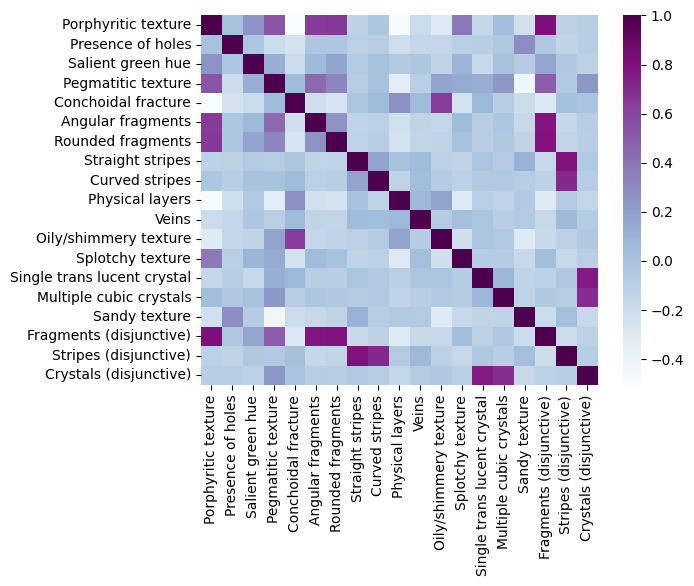

In [9]:
sns.heatmap(feature_data.corr(method="pearson"), annot = False, cmap="BuPu")

In [10]:
datafile.corr(method="pearson")

Porphyritic texture  Presence of holes  \
Porphyritic texture                     1.000000           0.017601   
Presence of holes                       0.017601           1.000000   
Salient green hue                       0.255830          -0.026329   
Pegmatitic texture                      0.534070          -0.199425   
Conchoidal fracture                    -0.505542          -0.248047   
Angular fragments                       0.645724          -0.026176   
Rounded fragments                       0.653319          -0.026623   
Straight stripes                       -0.117642          -0.112504   
Curved stripes                         -0.026782          -0.086442   
Physical layers                        -0.490498          -0.210501   
Veins                                  -0.189307          -0.155518   
Oily/shimmery texture                  -0.310966          -0.154314   
Splotchy texture                        0.373241          -0.098999   
Single trans lucent crystal            -0.163897          -0.082330   
Multiple cubic crystals                 0.046817          -0.044729   
Sandy texture                          -0.226060           0.283791   
Fragments (disjunctive)                 0.819815          -0.035854   
Stripes (disjunctive)                  -0.108380          -0.132162   
Crystals (disjunctive)                 -0.086319          -0.087471   
rock category                          -0.305296          -0.301462   

                             Salient green hue  Pegmatitic texture  \
Porphyritic texture                   0.255830            0.534070   
Presence of holes                    -0.026329           -0.199425   
Salient green hue                     1.000000            0.126113   
Pegmatitic texture                    0.126113            1.000000   
Conchoidal fracture                  -0.189701            0.055266   
Angular fragments                     0.064291            0.450381   
Rounded fragments                     0.186064            0.321181   
Straight stripes                     -0.061815           -0.081682   
Curved stripes                        0.006080            0.006070   
Physical layers                      -0.050614           -0.334001   
Veins                                -0.033938           -0.099182   
Oily/shimmery texture                -0.131127            0.180904   
Splotchy texture                      0.089565            0.141837   
Single trans lucent crystal          -0.168250            0.128090   
Multiple cubic crystals               0.011505            0.237183   
Sandy texture                        -0.072024           -0.442259   
Fragments (disjunctive)               0.169734            0.498259   
Stripes (disjunctive)                -0.042696           -0.055575   
Crystals (disjunctive)               -0.109629            0.243675   
rock category                        -0.104748           -0.164925   

                             Conchoidal fracture  Angular fragments  \
Porphyritic texture                    -0.505542           0.645724   
Presence of holes                      -0.248047          -0.026176   
Salient green hue                      -0.189701           0.064291   
Pegmatitic texture                      0.055266           0.450381   
Conchoidal fracture                     1.000000          -0.210173   
Angular fragments                      -0.210173           1.000000   
Rounded fragments                      -0.260734           0.260913   
Straight stripes                       -0.019918          -0.137379   
Curved stripes                          0.058211          -0.103715   
Physical layers                         0.275226          -0.229081   
Veins                                   0.058838          -0.130497   
Oily/shimmery texture                   0.641196          -0.152724   
Splotchy texture                       -0.240125           0.055986   
Single trans lucent crystal             0.075173          -0.086229   
M

<Axes: >

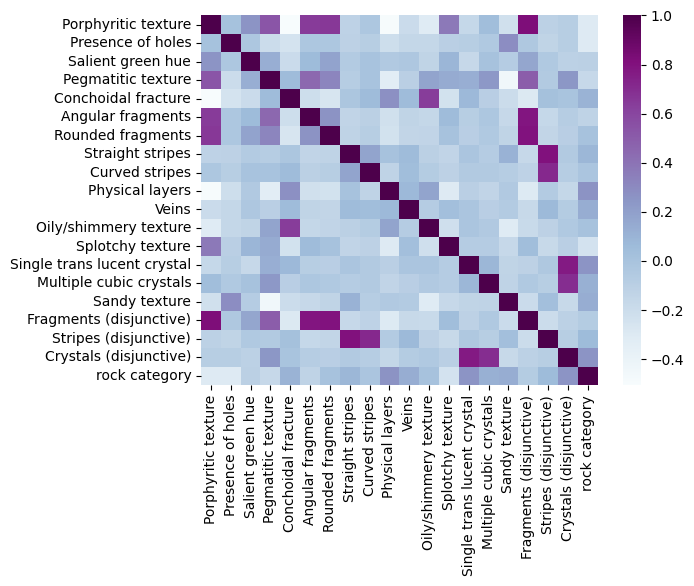

In [11]:
sns.heatmap(datafile.corr(method="pearson"), annot = False, cmap="BuPu")

In [12]:
# Finding the Correlation for every attribute with the label - 'rock category'
for column in feature_data:
    print(column,": ", feature_data[column].corr(label_data['rock category']))

Porphyritic texture :  -0.3052957960364324
Presence of holes :  -0.30146182457972875
Salient green hue :  -0.1047475785537981
Pegmatitic texture :  -0.1649247589647711
Conchoidal fracture :  0.10378114328154169
Angular fragments :  -0.12338788168455792
Rounded fragments :  0.009449838024912054
Straight stripes :  0.08692262702721483
Curved stripes :  -0.016679915120261884
Physical layers :  0.2628552601652849
Veins :  0.13009433613641336
Oily/shimmery texture :  0.007679351908265154
Splotchy texture :  -0.24292104705123288
Single trans lucent crystal :  0.25354970949160544
Multiple cubic crystals :  0.12116304221364999
Sandy texture :  0.13223977275548732
Fragments (disjunctive) :  -0.06802161826309239
Stripes (disjunctive) :  0.06182482411100317
Crystals (disjunctive) :  0.25838629087215376


In [13]:
# Finding attributes that are positively correlated
pos_cols = []
print("The negatively Correlated Attributes are - ")
for column in feature_data:
    if feature_data[column].corr(label_data['rock category']) > 0:
        print("\t", column,": ", feature_data[column].corr(label_data['rock category']))
        pos_cols.append(column)

The negatively Correlated Attributes are - 
	 Conchoidal fracture :  0.10378114328154169
	 Rounded fragments :  0.009449838024912054
	 Straight stripes :  0.08692262702721483
	 Physical layers :  0.2628552601652849
	 Veins :  0.13009433613641336
	 Oily/shimmery texture :  0.007679351908265154
	 Single trans lucent crystal :  0.25354970949160544
	 Multiple cubic crystals :  0.12116304221364999
	 Sandy texture :  0.13223977275548732
	 Stripes (disjunctive) :  0.06182482411100317
	 Crystals (disjunctive) :  0.25838629087215376


In [14]:
# Finding attributes that are negatively correlated
neg_cols = []
print("The negatively Correlated Attributes are - ")
for column in feature_data:
    if feature_data[column].corr(label_data['rock category']) < 0:
        print("\t", column,": ", feature_data[column].corr(label_data['rock category']))
        neg_cols.append(column)

The negatively Correlated Attributes are - 
	 Porphyritic texture :  -0.3052957960364324
	 Presence of holes :  -0.30146182457972875
	 Salient green hue :  -0.1047475785537981
	 Pegmatitic texture :  -0.1649247589647711
	 Angular fragments :  -0.12338788168455792
	 Curved stripes :  -0.016679915120261884
	 Splotchy texture :  -0.24292104705123288
	 Fragments (disjunctive) :  -0.06802161826309239


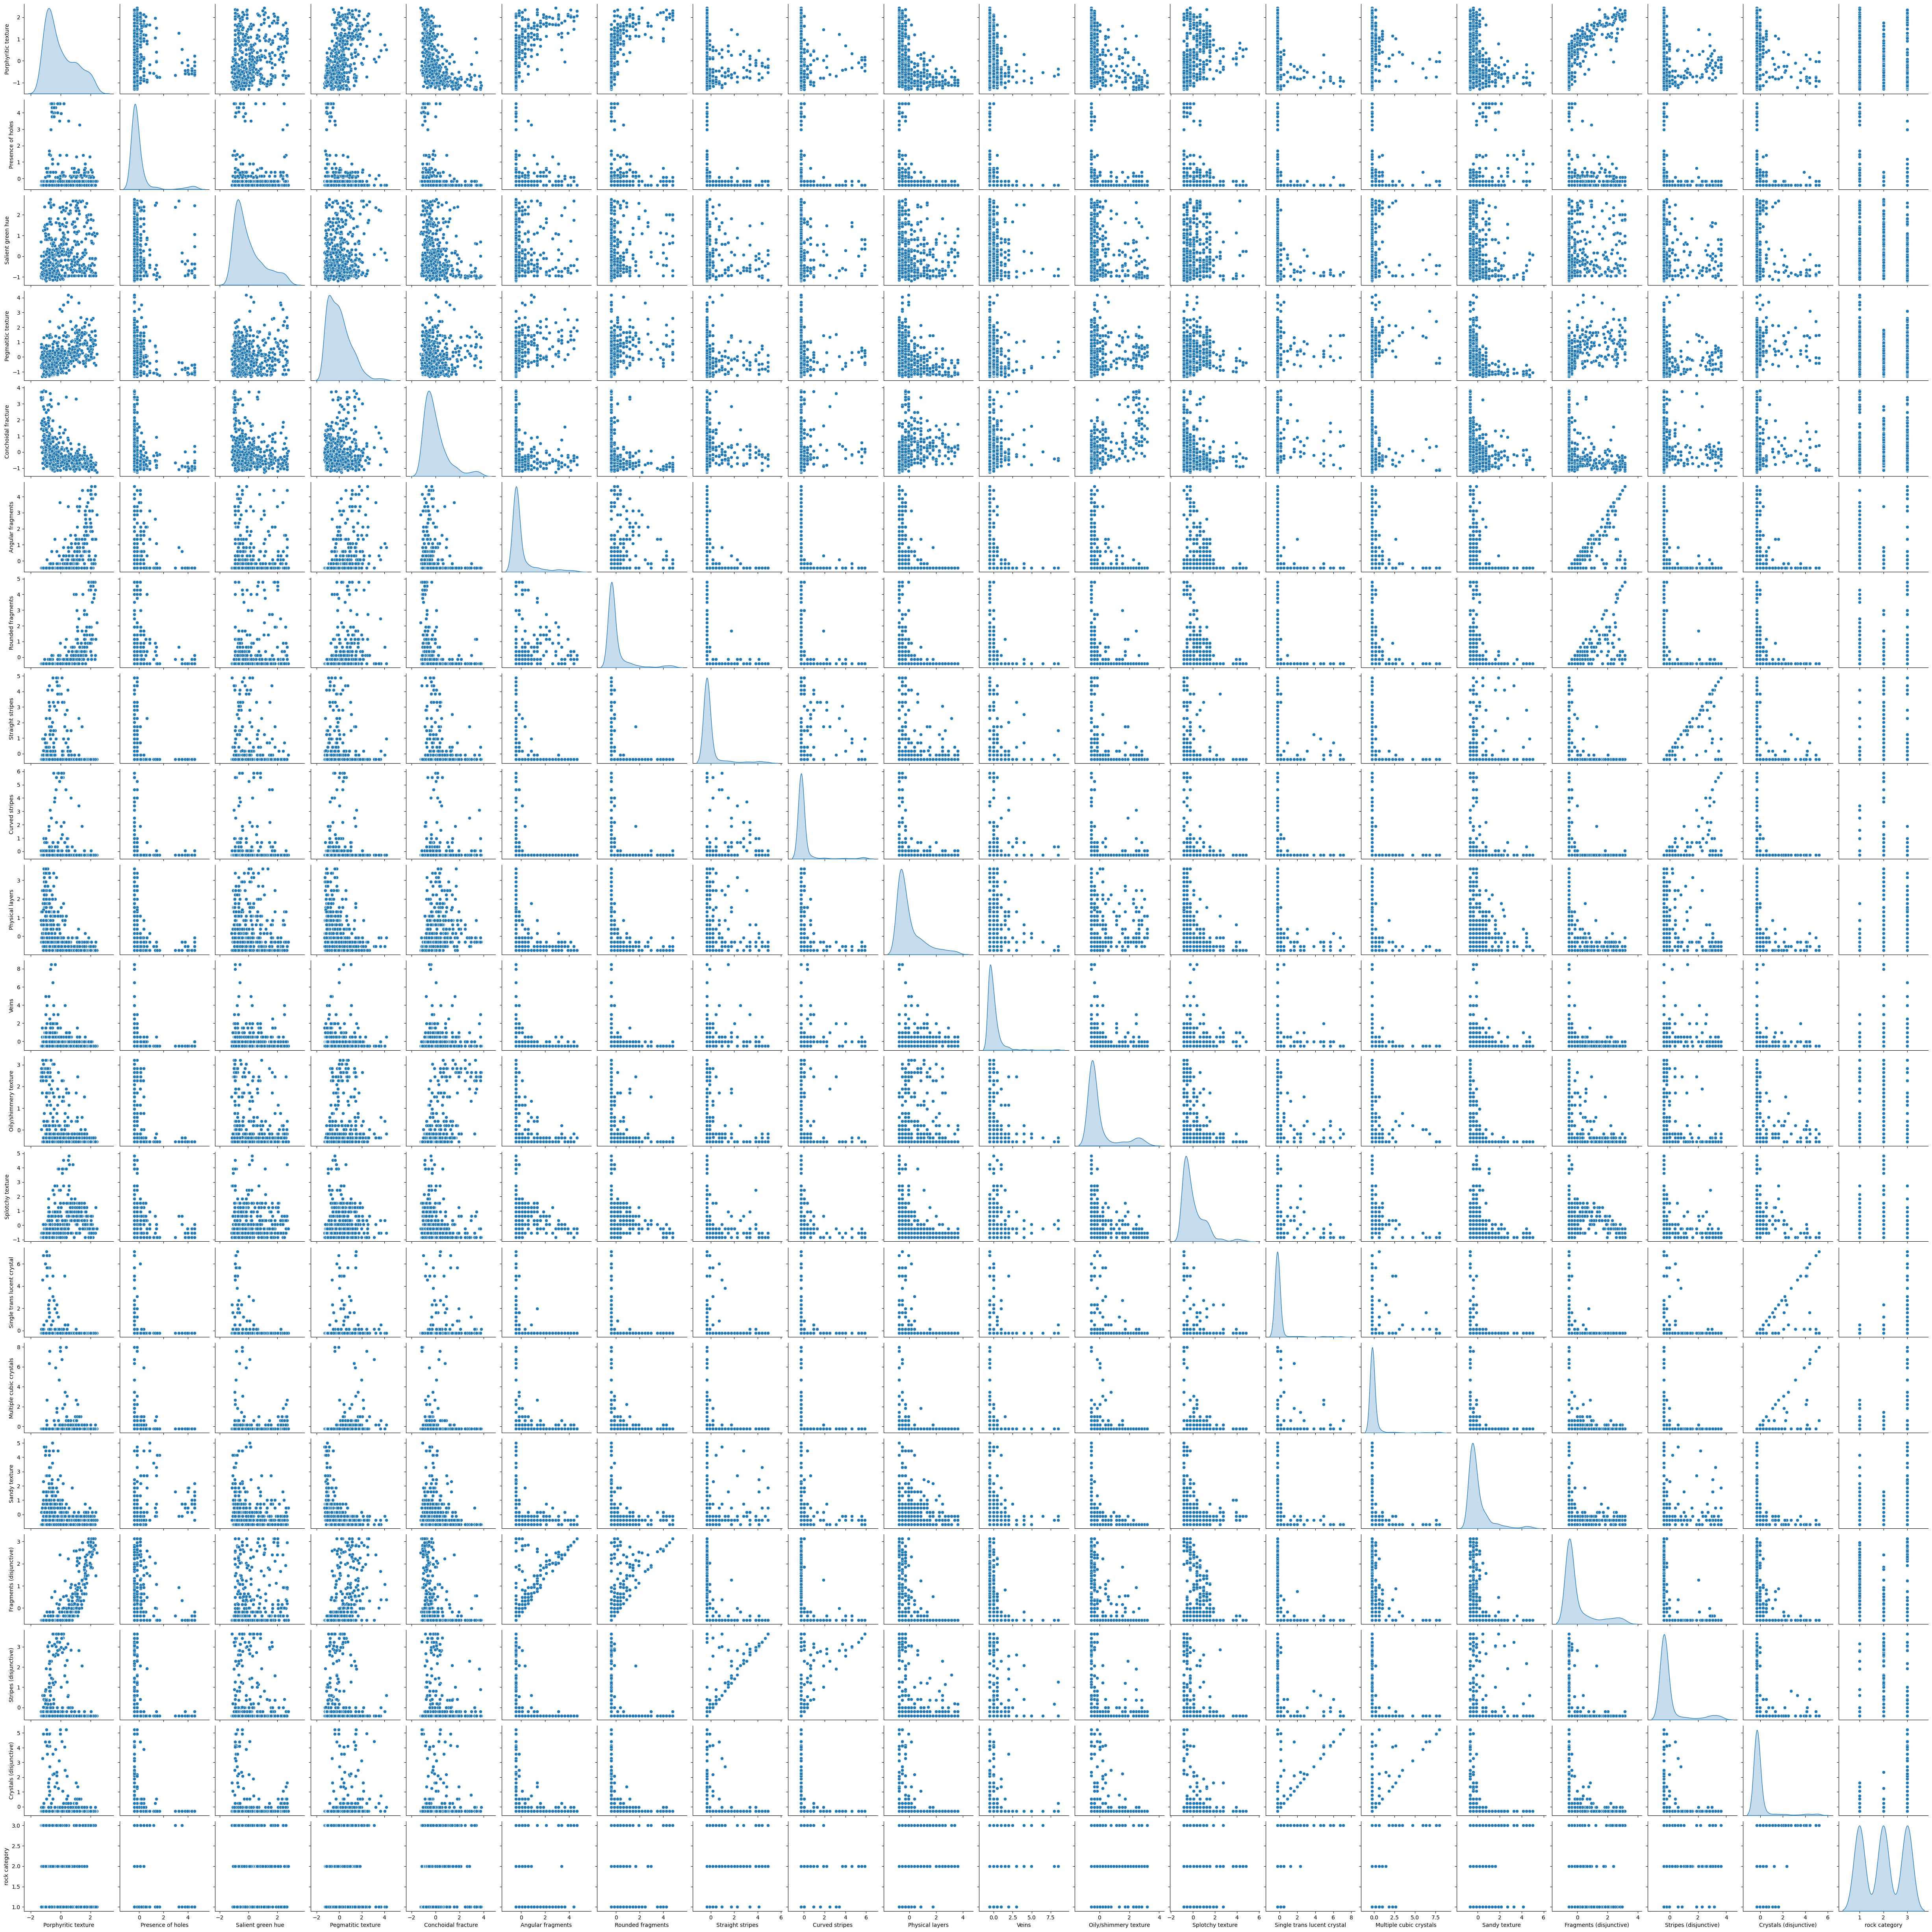

In [15]:
# Generating Scatter Plots
sns.pairplot(datafile, diag_kind="kde")

<H3>Answer 2 
    
* The columns 'Porphyritic texture', 'Presence of holes', 'Salient green hue', 'Pegmatitic texture', 'Angular fragments', 'Curved  stripes', 'Splotchy texture', 'Fragments (disjunctive)' are negatively correlated to the label - 'rock category'. <br>
    
* The columsns 'Conchoidal fracture', 'Rounded fragments', 'Straight stripes', 'Physical layers', 'Veins', 'Oily/shimmery texture', 'Single trans lucent crystal', 'Multiple cubic crystals', 'Sandy texture', 'Stripes (disjunctive)', 'Crystals (disjunctive)' are positively correlated to the label - 'rock category'.</H3>

<h1>Question 3 <br>
Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset. </h1>

In [16]:
# Splitting data into 60% training and 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(feature_data, label_data, test_size=0.4, random_state=42)

# Splitting data into test & validation based of the 40% Temp data
# Splitting data into 50% testing and 50% validation
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
feature_data.describe()

Porphyritic texture  Presence of holes  Salient green hue  \
count         5.400000e+02       5.400000e+02       5.400000e+02   
mean         -1.851852e-09       9.629630e-08       5.370370e-08   
std           1.000000e+00       1.000000e+00       1.000000e+00   
min          -1.321491e+00      -4.076230e-01      -1.187950e+00   
25%          -8.236470e-01      -4.076230e-01      -7.615050e-01   
50%          -3.009100e-01      -4.076230e-01      -3.751970e-01   
75%           7.644770e-01      -1.596880e-01       5.843033e-01   
max           2.422299e+00       4.551072e+00       2.750390e+00   

       Pegmatitic texture  Conchoidal fracture  Angular fragments  \
count        5.400000e+02         5.400000e+02       5.400000e+02   
mean        -6.296296e-08        -4.074074e-08      -1.537037e-07   
std          1.000000e+00         1.000000e+00       1.000000e+00   
min         -1.322715e+00        -1.248012e+00      -4.360040e-01   
25%         -8.046310e-01        -6.991450e-01      -4.360040e-01   
50%         -1.829290e-01        -2.715380e-01      -4.360040e-01   
75%          5.769290e-01         3.571070e-01      -1.820210e-01   
max          4.175892e+00         3.813059e+00       4.643652e+00   

       Rounded fragments  Straight stripes  Curved stripes  Physical layers  \
count       5.400000e+02      5.400000e+02    5.400000e+02     5.400000e+02   
mean       -1.666667e-08     -1.814815e-07   -1.481481e-08    -1.166667e-07   
std         1.000000e+00      1.000000e+00    1.000000e+00     1.000000e+00   
min        -4.051840e-01     -3.523860e-01   -2.602240e-01    -7.591280e-01   
25%        -4.051840e-01     -3.523860e-01   -2.602240e-01    -7.591280e-01   
50%        -4.051840e-01     -3.523860e-01   -2.602240e-01    -2.991730e-01   
75%        -1.450180e-01     -3.523860e-01   -2.602240e-01     3.907600e-01   
max         4.798130e+00      4.888957e+00    5.862693e+00     3.610446e+00   

              Veins  Oily/shimmery texture  Splotchy texture  \
count  5.400000e+02           5.400000e+02      5.400000e+02   
mean  -1.629630e-07           1.703704e-07     -6.851852e-08   
std    1.000000e+00           9.999999e-01      1.000000e+00   
min   -5.121600e-01          -5.406530e-01     -8.468870e-01   
25%   -5.121600e-01          -5.406530e-01     -8.468870e-01   
50%   -5.121600e-01          -5.406530e-01     -2.490840e-01   
75%   -1.384200e-02          -1.658870e-01      3.487180e-01   
max    8.457556e+00           3.207009e+00      4.832237e+00   

       Single trans lucent crystal  Multiple cubic crystals  Sandy texture  \
count                 5.400000e+02             5.400000e+02   5.400000e+02   
mean                 -5.555556e-09             3.388889e-07   1.203704e-07   
std                   1.000000e+00             9.999999e-01   1.000000e+00   
min                  -2.279220e-01            -2.250450e-01  -6.859370e-01   
25%                  -2.279220e-01            -2.250450e-01  -6.859370e-01   
50%                  -2.279220e-01            -2.250450e-01  -4.011240e-01   
75%                  -2.279220e-01            -2.250450e-01   1.685000e-01   
max                   7.120010e+00             7.986072e+00   5.010309e+00   

       Fragments (disjunctive)  Stripes (disjunctive)  Crystals (disjunctive)  
count             5.400000e+02           5.400000e+02            5.400000e+02  
mean             -1.148148e-07          -1.759259e-07            3.018519e-07  
std               1.000000e+00           1.000000e+00            9.999999e-01  
min              -5.413910e-01          -4.092470e-01           -3.104190e-01  
25%              -5.413910e-01          -4.092470e-01           -3.104190e-01  
50%              -5.413910e-01          -4.092470e-01           -3.104190e-01  
75%               1.042300e-02          -2.072980e-01           -3.104190e-01  
max               3.137369e+00           3.629722e+00            5.216791e+00

array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily/shimmery texture'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single trans lucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments (disjunctive)'}>,
        <Axes: title={'center': 'Stripes (disjunctive

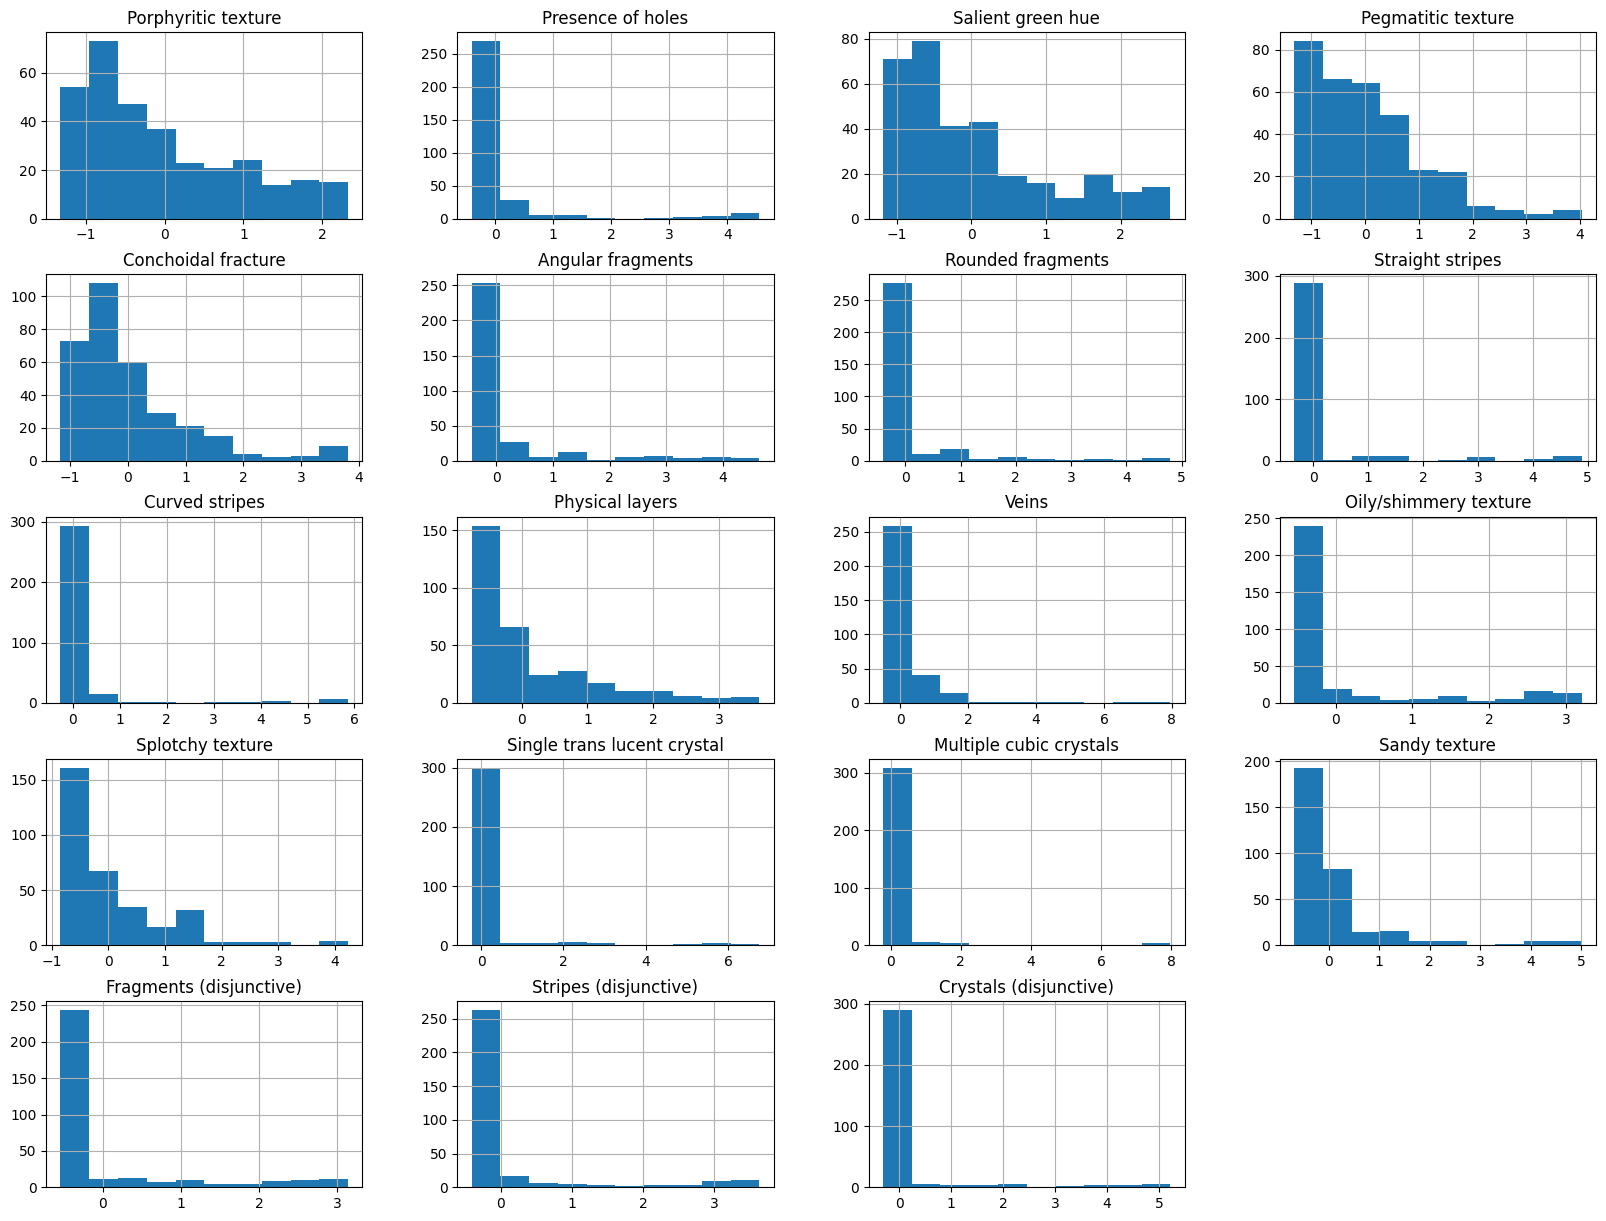

In [18]:
X_train.hist(grid=True,figsize=(20,15))

array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily/shimmery texture'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single trans lucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments (disjunctive)'}>,
        <Axes: title={'center': 'Stripes (disjunctive

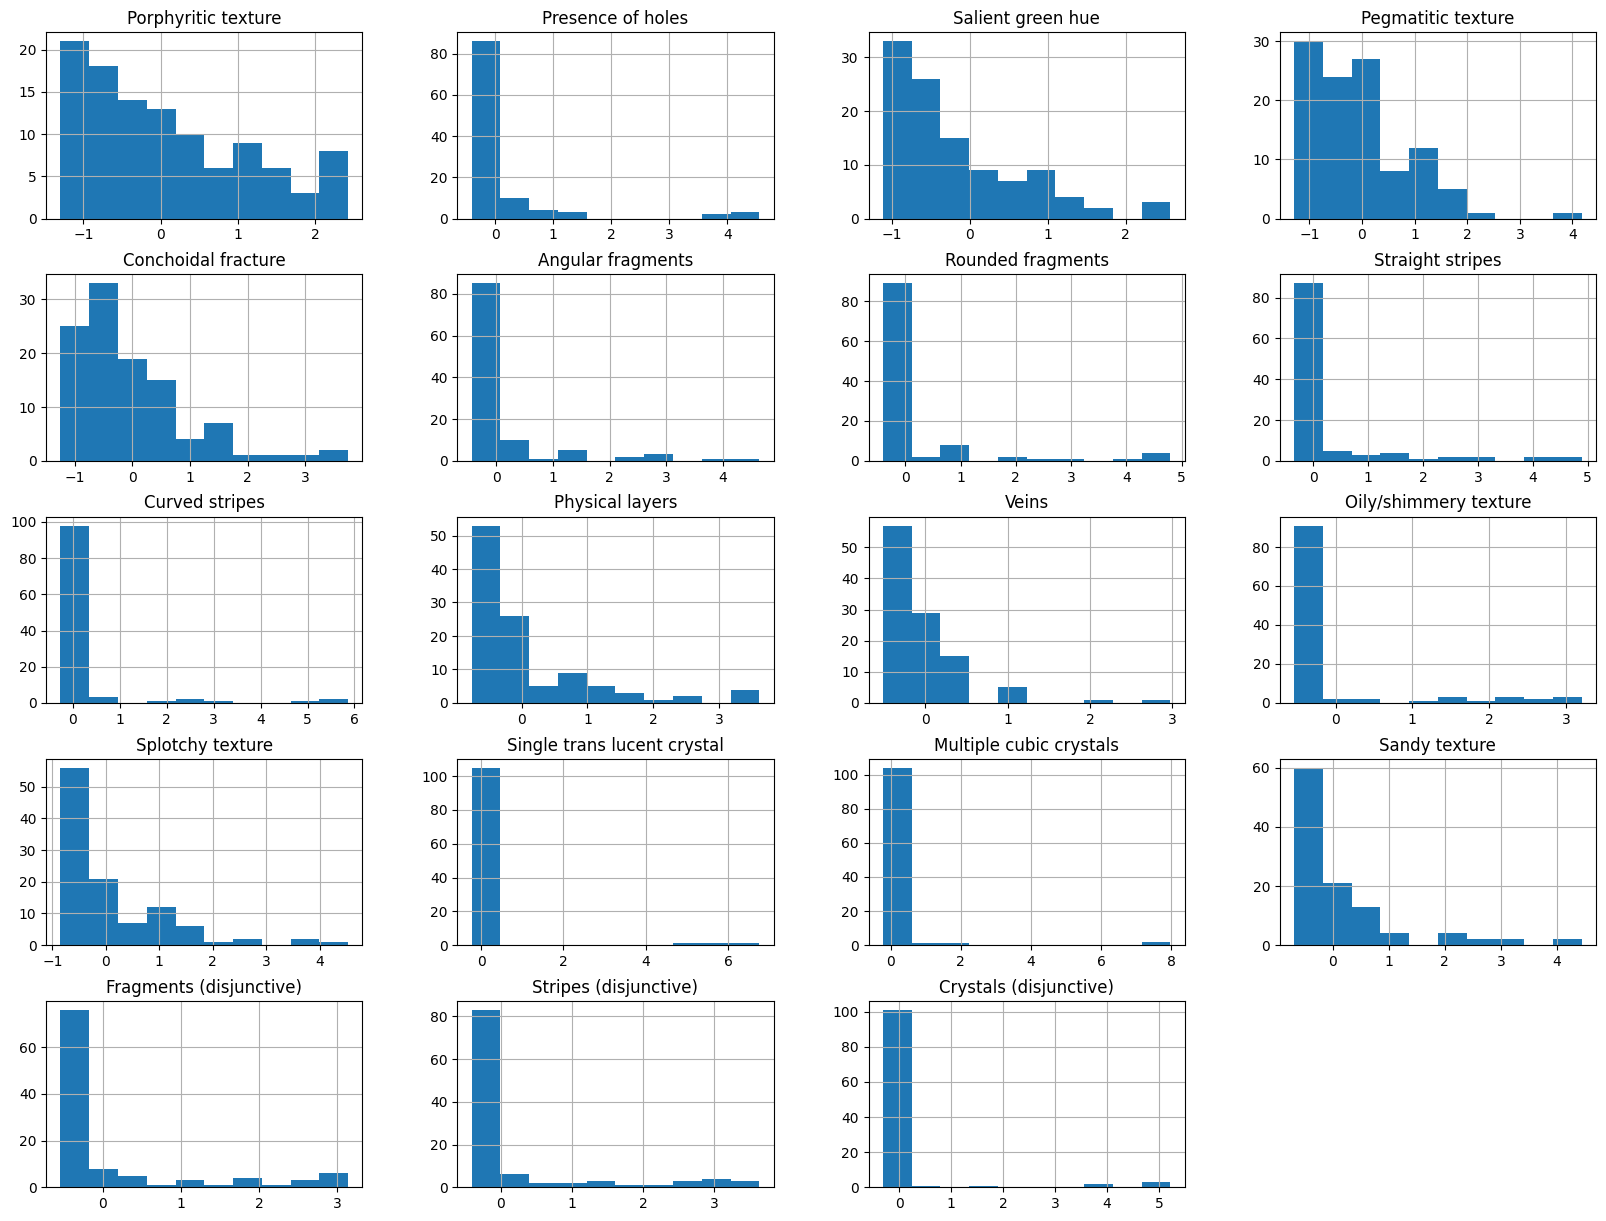

In [19]:
X_validation.hist(grid=True,figsize=(20,15))

array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily/shimmery texture'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single trans lucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments (disjunctive)'}>,
        <Axes: title={'center': 'Stripes (disjunctive

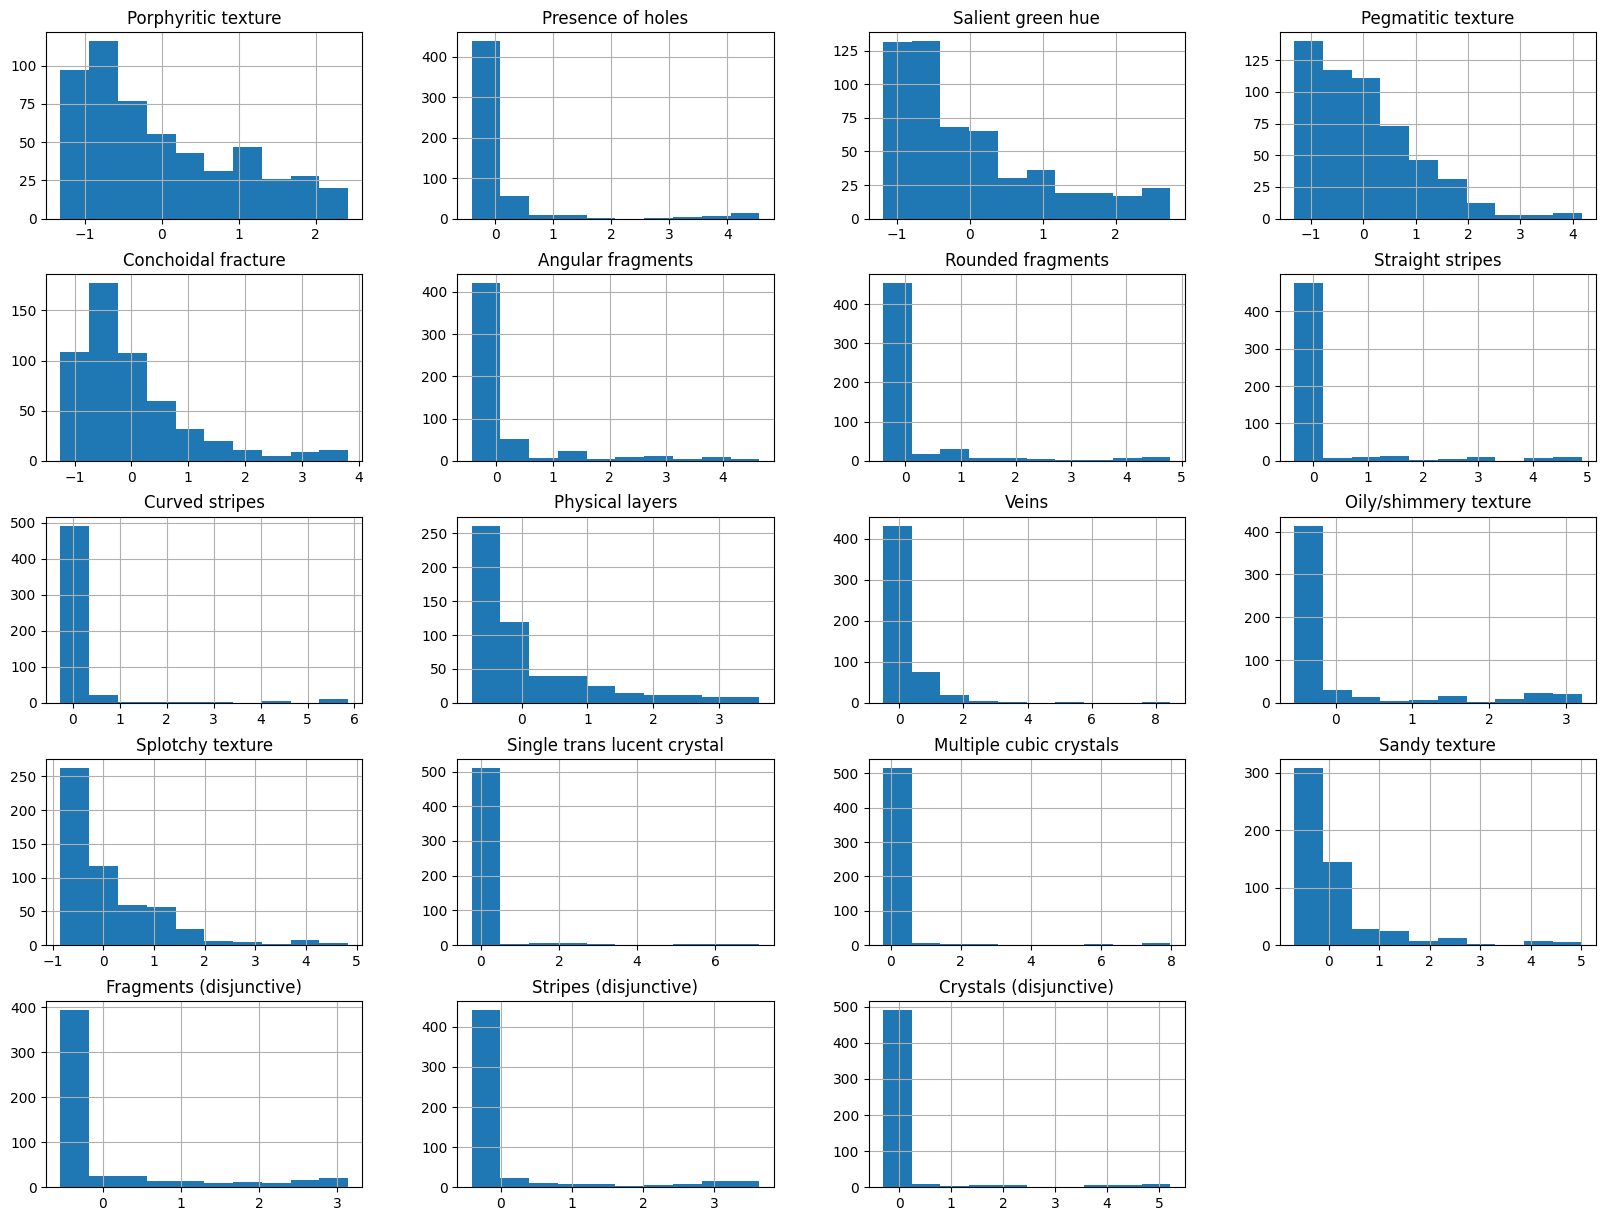

In [20]:
feature_data.hist(grid=True,figsize=(20,15))

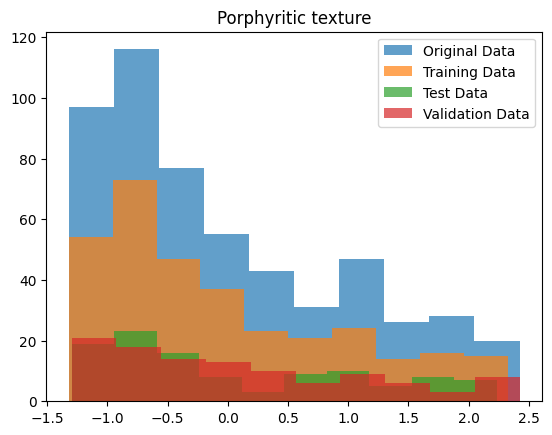

<Figure size 600x800 with 0 Axes>

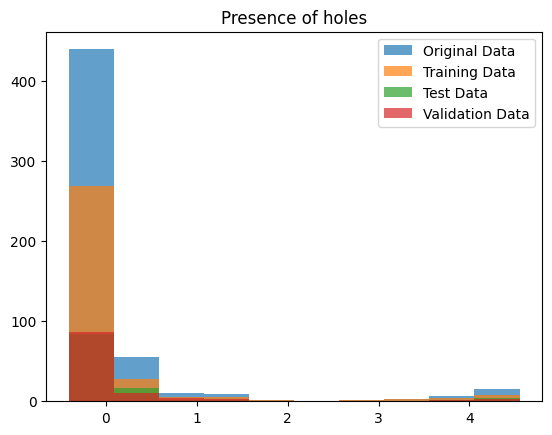

<Figure size 600x800 with 0 Axes>

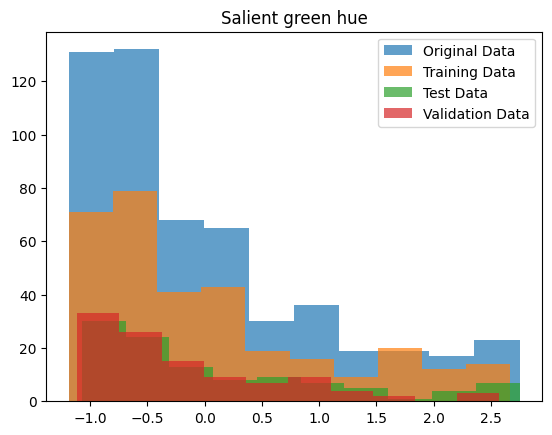

<Figure size 600x800 with 0 Axes>

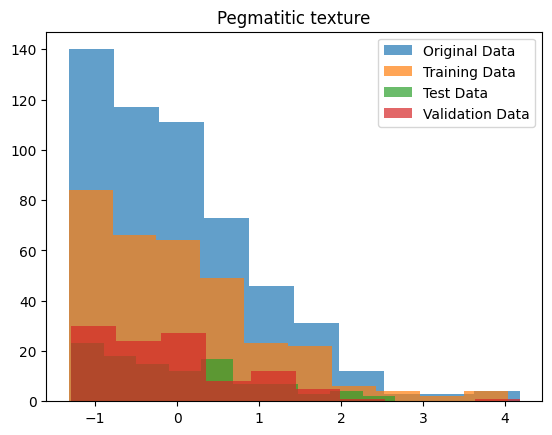

<Figure size 600x800 with 0 Axes>

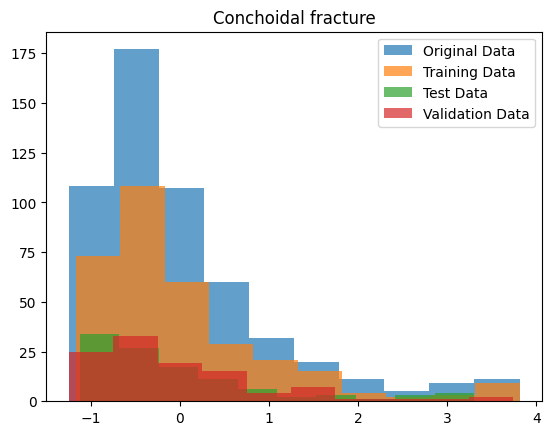

<Figure size 600x800 with 0 Axes>

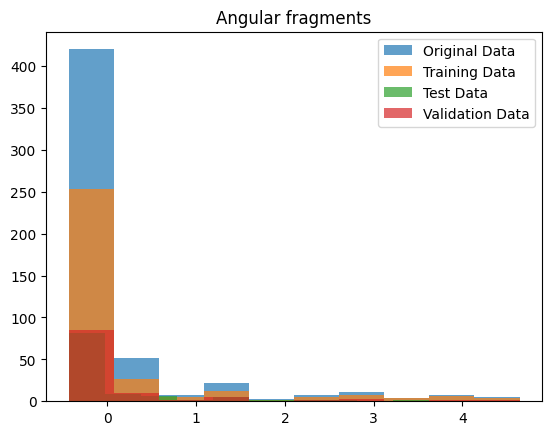

<Figure size 600x800 with 0 Axes>

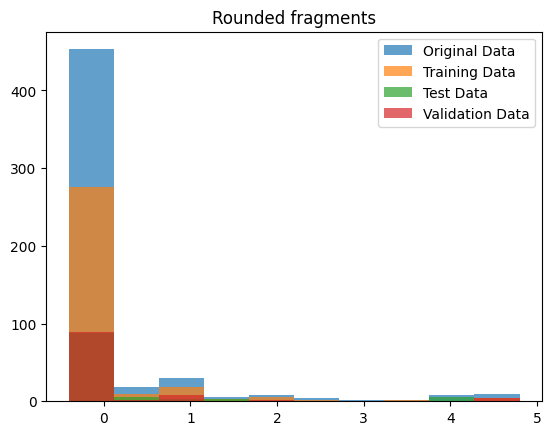

<Figure size 600x800 with 0 Axes>

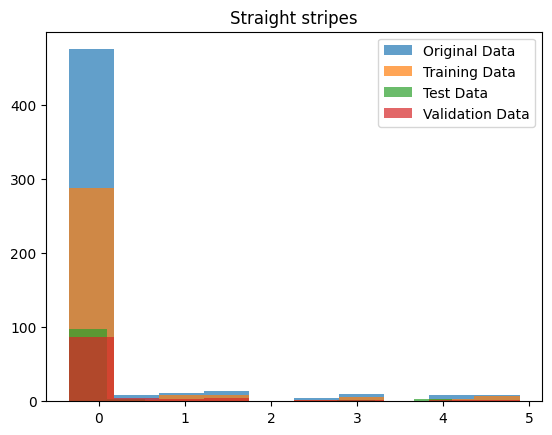

<Figure size 600x800 with 0 Axes>

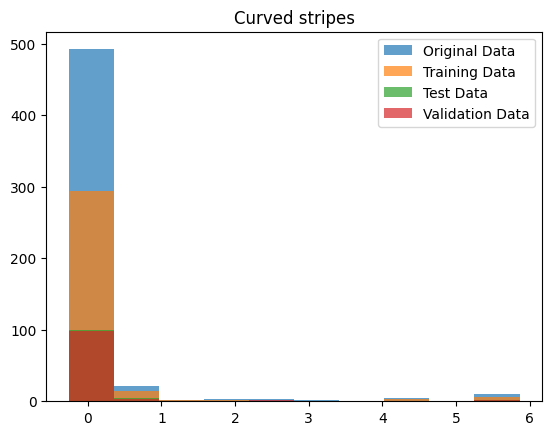

<Figure size 600x800 with 0 Axes>

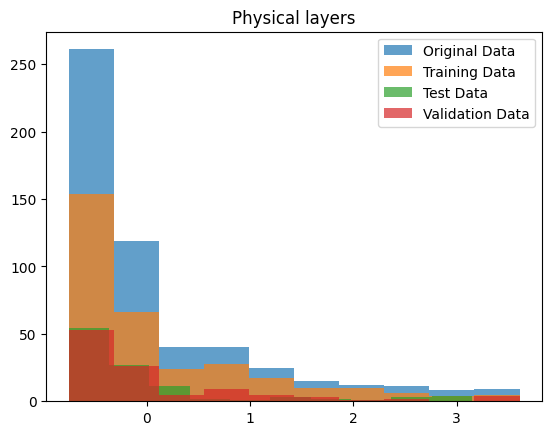

<Figure size 600x800 with 0 Axes>

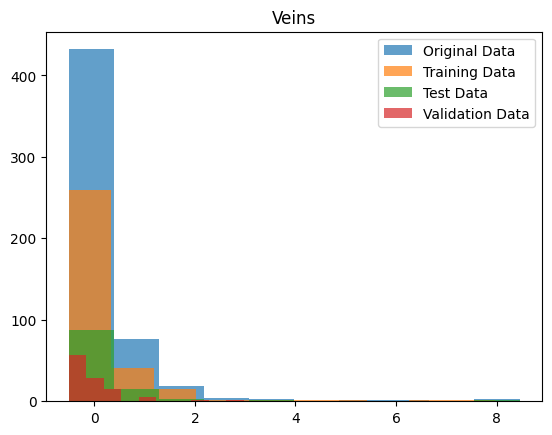

<Figure size 600x800 with 0 Axes>

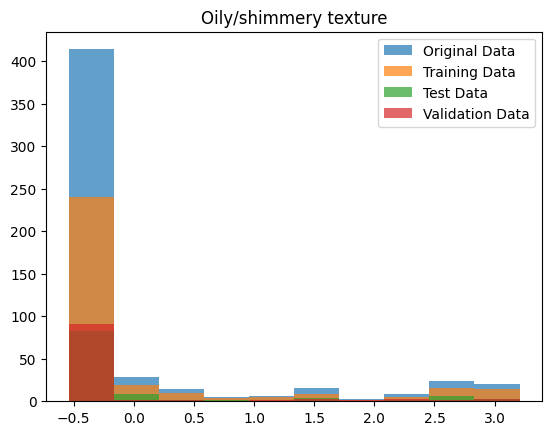

<Figure size 600x800 with 0 Axes>

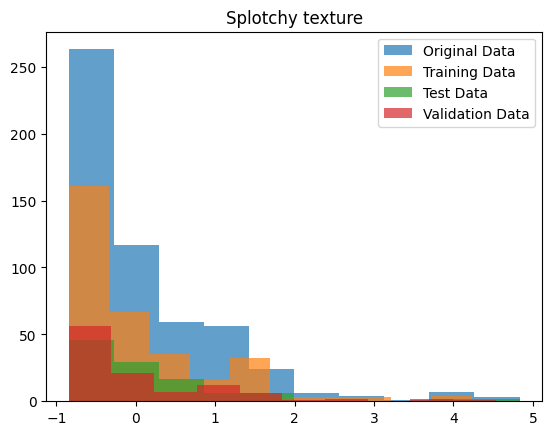

<Figure size 600x800 with 0 Axes>

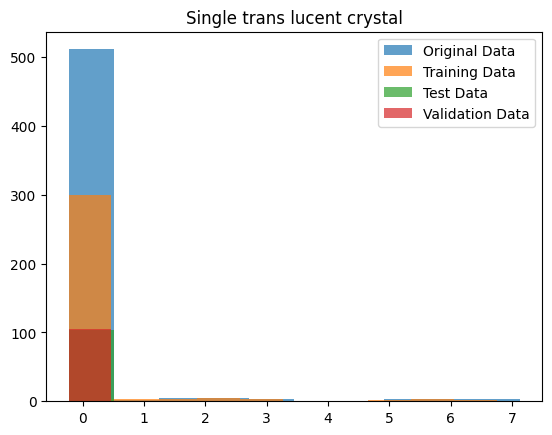

<Figure size 600x800 with 0 Axes>

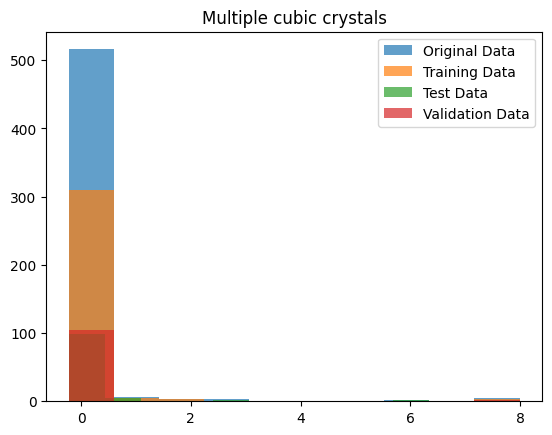

<Figure size 600x800 with 0 Axes>

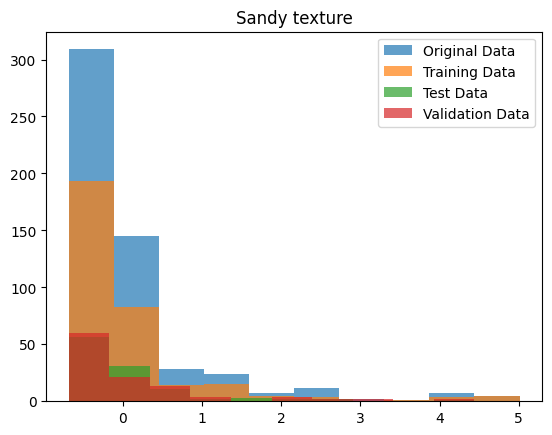

<Figure size 600x800 with 0 Axes>

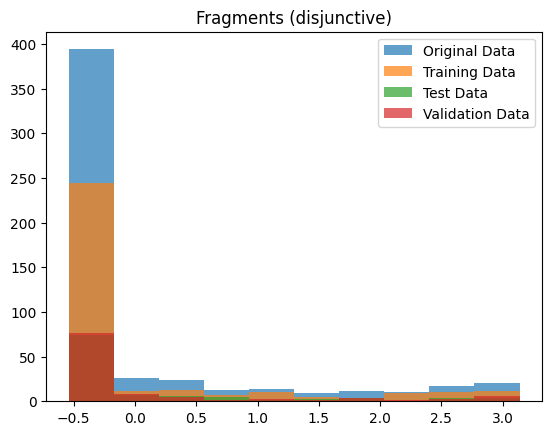

<Figure size 600x800 with 0 Axes>

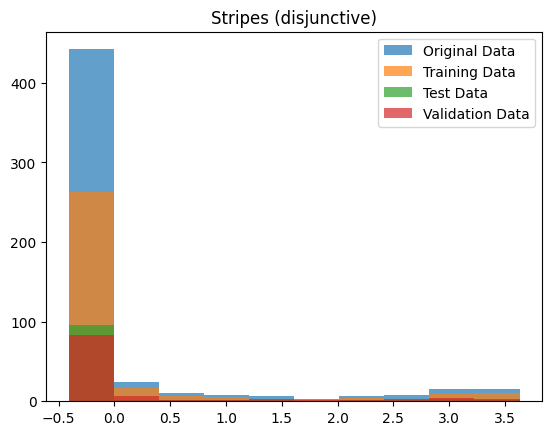

<Figure size 600x800 with 0 Axes>

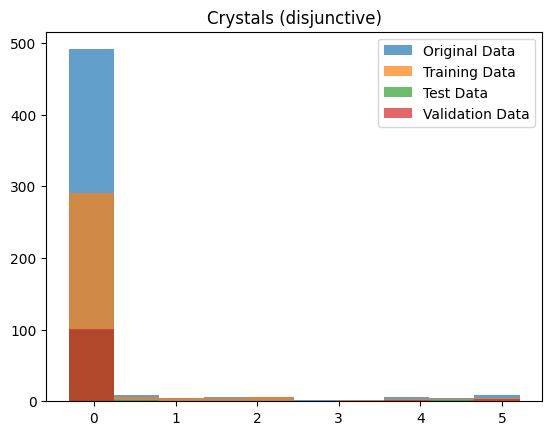

<Figure size 600x800 with 0 Axes>

In [21]:
# Plotting every Column for Original, Test, Train & Validation data
# in order to verify whether the datasets are representative of the entire dataset

for cols in feature_data.columns:
    fig, ax = plt.subplots()
    ax.hist(feature_data[cols], alpha = 0.7, label = "Original Data")
    ax.hist(X_train[cols], alpha = 0.7, label = "Training Data")
    ax.hist(X_test[cols], alpha = 0.7, label = "Test Data")
    ax.hist(X_validation[cols], alpha = 0.7, label = "Validation Data")
    ax.legend()
    plt.title(cols)
    plt.figure(figsize=(6,8))


<h3>Answer 3<br>
    
- The feature & lable data was divided into a 60%, 20% & 20% split for Trainig, Testing & Validating data respectively.
- We have plotted histograms for evey data set, to verify whether it represents the entire dataset.
- After plotting the datasets for each attribute in the train, test, validation & original dataset, we can verify that the training, testing & validation datasets are representative of the entire dataset. </h3>

<h1>Q.4 Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):</h1>
<h2>
    
1. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. <br>
2. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.<br>        
3. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.<br>
</h2>

<h1> Multimonial Logistic regression</h1>

In [22]:
# Multimonial Logistic regression

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [ 1.75, 2.0, 2.25, 2.50, 2.75, 3.0, 4.0, 5.0],  # Regularization parameter
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cholesky'],  # Optimization algorithm
    'max_iter': [500, 600, 800, 1000],  # Maximum number of iterations
}

# Create the logistic regression classifier
logistic_regression = LogisticRegression(multi_class='multinomial', random_state=42)

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=7, scoring='accuracy', return_train_score = True)
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("The best parameter are: ", best_params)
print("The accuracy score for the above parameters: ", grid_search.best_score_)

# Train the model with the best hyperparameters
best_logistic_regression = LogisticRegression(multi_class='multinomial', random_state=42, **best_params)
best_logistic_regression.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = best_logistic_regression.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

The best parameter are:  {'C': 2.5, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
The accuracy score for the above parameters:  0.7064226245539844
Validation Metrics:
	Accuracy: 0.7222
	Precision: 0.7275
	Recall: 0.7222
	F1 Score: 0.7237


<H3>
    
Using the above gridsearch a base line for the hyper parameter has been obtained which are - <br>
- {'C': 4.0, 'max_iter': 500, 'solver': 'lbfgs'}.

Using these hyper parameter values as reference, the hyper parameters have been tuned below -</H3>


In [23]:
# Multimonial Logistic regression

# Finalizing the model with the best hyperparameters
final_logistic_regression = LogisticRegression(multi_class='multinomial', penalty = 'l1', C = 5, max_iter = 1000, 
                                               solver = 'saga', random_state = 42)
final_logistic_regression.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = final_logistic_regression.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Test set performance
y_test_pred = final_logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Validation Metrics:
	Accuracy: 0.7407
	Precision: 0.7449
	Recall: 0.7407
	F1 Score: 0.7421

Test Metrics:
	Accuracy: 0.7315
	Precision: 0.7334
	Recall: 0.7315
	F1 Score: 0.7300


<H3> Compared to the Grid Search Results -

1. Changing the hyper parameters do not really affect the model accuracy much.
2. Only after increasing C to 4 the model shows the most accuracy at 0.7407</H3>

<h1>Support Vector Machines</h1>

In [24]:
from sklearn.svm import SVC

# Define hyperparameter grid
param_grid = {
    'C': [2.0, 3.0, 4.0, 5.0, 6.0],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of polynomial kernel (if applicable)
    'gamma': ['scale', 'auto', 0.01, 0.1, 1.0, 0.2],  # Kernel coefficient
}

# Create the SVM classifier
svm_classifier = SVC(random_state=42,probability=True)

# Grid search to find the best hyperparameters
grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=6, scoring='accuracy')
grid_search_svm.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("The Best parameter combination is: ", best_params_svm)
print("The accuracy score for the above parameters: ", grid_search_svm.best_score_)

# Train the model with the best hyperparameters
best_svm_classifier = SVC(random_state=42, **best_params_svm,probability=True)
best_svm_classifier.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = best_svm_classifier.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

The Best parameter combination is:  {'C': 2.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
The accuracy score for the above parameters:  0.7438271604938271
Validation Metrics:
	Accuracy: 0.7963
	Precision: 0.8023
	Recall: 0.7963
	F1 Score: 0.7978


<H3>
    
Using the above gridsearch a base line for the hyper parameter has been obtained which are - <br>
- {'C': 2.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}.

Using these hyper parameter values as reference, the hyper parameters have been tuned in the following manner -</H3>


In [25]:
from sklearn.svm import SVC

# Finalizing the model with the best hyperparameters
final_svm_classifier = SVC(random_state=42, C = 5.5, degree = 2, gamma = 'scale', kernel = 'rbf', probability=True)
final_svm_classifier.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = final_svm_classifier.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Test set performance
y_test_pred = final_svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Validation Metrics:
	Accuracy: 0.8148
	Precision: 0.8246
	Recall: 0.8148
	F1 Score: 0.8167

Test Metrics:
	Accuracy: 0.7870
	Precision: 0.7916
	Recall: 0.7870
	F1 Score: 0.7862


<H3>
    
Compared to the Grid Search results -
    
1. Increasing the degree does not affect the model accuracy.
2. Changing the gamma to a values like [0.001, 0.01, 1, 5, 10] decreases the model accuracy.
3. Increasing the regularization hyperparameter to 5.5 increases provides the highest accuracy of 0.8148 to the model. Increasing or reducing the C from 5.5 decreases the accuracy of the model.

Therefore, the parameters that provide the highest accuracy are -
 -  {'C': 5.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
</H3>

<h1>Random Forrest Classifier</h1>

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180],  # Number of trees
    'max_depth': [7, 8, 9, 10, 11, 12],  # Maximum depth of trees
    'min_samples_split': [3, 4, 5, 6],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at leaf nodes
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print ("Best Parameters are: ", best_params_rf)
print("The accuracy score for the above parameters: ", grid_search_rf.best_score_)

# Train the model with the best hyperparameters
best_random_forest = RandomForestClassifier(random_state=42, **best_params_rf)
best_random_forest.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = best_random_forest.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")


Best Parameters are:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 130}
The accuracy score for the above parameters:  0.7407407407407408
Validation Metrics:
	Accuracy: 0.7870
	Precision: 0.7960
	Recall: 0.7870
	F1 Score: 0.7879


<H3>
    
Using the above gridsearch a base line for the hyper parameter has been obtained which are -
- {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 130}.

Using these hyper parameter values as reference, the hyper parameters have been tuned in the following manner -</H3>


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Finalizing the model with the best hyperparameters
final_random_forest = RandomForestClassifier(random_state=42, max_depth = 7, min_samples_leaf = 1, 
                                             min_samples_split = 4, n_estimators = 160)
final_random_forest.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = final_random_forest.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Test set performance
y_test_pred = best_random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Validation Metrics:
	Accuracy: 0.8056
	Precision: 0.8150
	Recall: 0.8056
	F1 Score: 0.8070

Test Metrics:
	Accuracy: 0.7130
	Precision: 0.7144
	Recall: 0.7130
	F1 Score: 0.7125


<H3>
    
Compared to the Grid Search results -
    
1. Increasing or decreasing the max_depth requced the accuracy of the Validation Data
2. Increasing the min_samples_leaf reduces the accuracy for the model
3. Increasing the min_samples_split to 4 & n_estimators to 160 provides the highest accuracy. The accuracy reduces if either of the hyper parameters is changed. 

Therefore, the parameters that provide the highest accuracy are -
 -  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 160}
</H3>

<h1>Question 5<br> Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings.</h1>

In [28]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble of classifiers
ensemble_classifier_hard = VotingClassifier(
    estimators=[
        ('logistic_regression', best_logistic_regression),
        ('svm_classifier', final_svm_classifier),
        ('random_forest', final_random_forest)
    ],
    voting='hard'  # Use majority voting
)

# Train the ensemble on the training data
ensemble_classifier_hard.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble on the validation set
y_val_ensemble_pred = ensemble_classifier_hard.predict(X_validation)
val_ensemble_accuracy = accuracy_score(y_validation, y_val_ensemble_pred)
val_ensemble_precision = precision_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_recall = recall_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_f1 = f1_score(y_validation, y_val_ensemble_pred, average='weighted')

# Print Validation Data metrics
print(f"Validation Data Metrics: ")
print(f"\tAccuracy: {val_ensemble_accuracy:.4f}")
print(f"\tPrecision: {val_ensemble_precision:.4f}")
print(f"\tRecall: {val_ensemble_recall:.4f}")
print(f"\tF1 Score: {val_ensemble_f1:.4f}")

# Evaluate the ensemble on the test set
y_test_ensemble_pred = ensemble_classifier_hard.predict(X_test)
test_ensemble_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
test_ensemble_precision = precision_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_recall = recall_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

# Print Test Data metrics
print(f"\nTest Accuracy:")
print(f"\tAccuracy: {test_ensemble_accuracy:.4f}")
print(f"\tPrecision: {test_ensemble_precision:.4f}")
print(f"\tRecall: {test_ensemble_recall:.4f}")
print(f"\tF1 Score: {test_ensemble_f1:.4f}")

Validation Data Metrics: 
	Accuracy: 0.8241
	Precision: 0.8375
	Recall: 0.8241
	F1 Score: 0.8264

Test Accuracy:
	Accuracy: 0.7407
	Precision: 0.7422
	Recall: 0.7407
	F1 Score: 0.7387


In [29]:
# Create the ensemble of classifiers
ensemble_classifier_soft = VotingClassifier(
    estimators=[
        ('logistic_regression', best_logistic_regression),
        ('svm_classifier', best_svm_classifier),
        ('random_forest', final_random_forest)
    ],
    voting='soft',  # Use soft voting
    flatten_transform=True,  # Enable probability estimation
)

# Train the ensemble on the training data
ensemble_classifier_soft.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble on the validation set
y_val_ensemble_pred = ensemble_classifier_soft.predict(X_validation)
val_ensemble_accuracy = accuracy_score(y_validation, y_val_ensemble_pred)
val_ensemble_precision = precision_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_recall = recall_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_f1 = f1_score(y_validation, y_val_ensemble_pred, average='weighted')

# Print Validation Data metrics
print(f"Validation Data Metrics: ")
print(f"\tAccuracy: {val_ensemble_accuracy:.4f}")
print(f"\tPrecision: {val_ensemble_precision:.4f}")
print(f"\tRecall: {val_ensemble_recall:.4f}")
print(f"\tF1 Score: {val_ensemble_f1:.4f}")

# Evaluate the ensemble on the test set
y_test_ensemble_pred = ensemble_classifier_soft.predict(X_test)
test_ensemble_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
test_ensemble_precision = precision_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_recall = recall_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

# Print Test Data metrics
print(f"\nTest Accuracy:")
print(f"\tAccuracy: {test_ensemble_accuracy:.4f}")
print(f"\tPrecision: {test_ensemble_precision:.4f}")
print(f"\tRecall: {test_ensemble_recall:.4f}")
print(f"\tF1 Score: {test_ensemble_f1:.4f}")

Validation Data Metrics: 
	Accuracy: 0.7870
	Precision: 0.8022
	Recall: 0.7870
	F1 Score: 0.7899

Test Accuracy:
	Accuracy: 0.7500
	Precision: 0.7559
	Recall: 0.7500
	F1 Score: 0.7471


<H1> Answer 5</H1>
<H4> 
    
As seen from the above 2 ensembles

1. Hard Ensemble
   - The Hard Ensemble is able to predict the Validation set with a 82%+ accuracy.
   - This Accuracy is more than every individual classifier.<br>
     
2. Soft Ensemble
   - The Soft Ensemble is unable to predict the Validation set with a 80% accuracy, as it takes an average of all the 3 classifiers.
   - The Soft Accuracy is being reduced due to the low Accuracy of Multinomial Logistic Regression.<br>
  
3. Therefore, we can conclude that the Hard Voting Ensemble is a better choice compared to the Soft Voting Ensemble.<br>

4. We can observe that for the Hard Voting Ensemble, there is a substantial difference between the Validation & Test accuracy.
   - The reason for this is cause we have all trained all the models & tuned the hyper parameters for the Validation Data, due to which we could say that all the models & the ensemble is overfitting the Validation Data, and not generalizing properly for the Test Data.<br>
  
5. The Accuracy for Validation & Test data is pretty close to each other, due to which we could say that the soft voting ensemble model generalizes better than the hard voting ensemble.
</H4>